In [1]:
# Following Kylie Ying's tutorial at https://www.youtube.com/watch?v=VtRLrQ3Ev-U

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
df = pd.read_csv(r'C:\Users\KSpicer\Desktop\neural_networks\wine-reviews.csv', usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])

In [4]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [5]:
df = df.dropna(subset=['description', 'points'])

In [6]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


(array([  397.,   692.,  1836.,  3025.,  6480.,  9530., 12600., 16933.,
        17207., 12226., 15410., 11359.,  9613.,  6489.,  3758.,  1535.,
          523.,   229.,    77.,    52.]),
 array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]),
 <BarContainer object of 20 artists>)

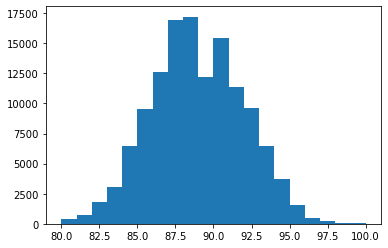

In [7]:
plt.hist(df['points'], bins=20)

In [8]:
df['label'] = (df.points >= 90).astype(int)
df.head()

,country,description,points,price,variety,winery,label
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos,0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian,0
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks,0


In [9]:
df = df[['description', 'label']]

In [10]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])
len(train), len(val), len(test)

(103976, 12997, 12998)

In [11]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.experimental.AUTOTUNE) # original tutorial had tf.data.AUTOTUNE, raised an error, checked Tensorflow 2.3 documentation (https://www.tensorflow.org/versions/r2.3/api_docs/python/tf/data/experimental#other_members) which specifies tf.data.experimental.AUTOTUN instead.
  return ds

In [12]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [13]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"Campo Le\xc3\xb2n is a jammy, chewy wine with raw notes of black cherry, Indian spice, cedar wood and melted chocolate. It's thick, syrupy and it's hard to imagine a balanced food pairing outside succulent red meat.",
        b'Rich and complex from the start, the nose and palate of this wine feature a fruit melange of mango, melon, banana wrapped in nicely integrated oak. For some, the acid may be a touch high but this keeps the wine bright and crisp, and sustains this fairly full, barrel-fermented wine\xe2\x80\x99s long finish.',
        b'This producer remains committed to showcasing this rare variety, making this 100% version of it from 40-plus-year-old dry-farmed vines. He lets the grapes hang out sur lie for five months in mostly stainless steel, with a small amount of neutral French oak. The result presents as full bodied, though the ripeness is restrained, a celebration of apple, vanilla, spicy lemongrass and robust min

In [14]:
tf.compat.v1.estimator.experimental.dnn_logit_fn_builder
import tensorflow_hub as hub

In [16]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.evaluate(train_data)
model.evaluate(valid_data)

history = model.fit(train_data, epochs=10, validation_data=valid_data)

UnimplementedError:  Cast string to float is not supported
	 [[node sequential/dense/Cast (defined at C:\Users\KSpicer\AppData\Local\Temp\ipykernel_16024\4085112087.py:3) ]] [Op:__inference_test_function_1013]

Function call stack:
test_function
